# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('D:\IronHack\labs\AI\supervised-learning-classification\data\website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
websites.sample(5)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
418,M0_144,39,11,UTF-8,nginx,640.0,NaN,NaN,NaN,NaN,...,1,4,1266,15,12,960,1548,15,4.0,1
1753,M4_47,143,27,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
195,B0_1222,32,8,UTF-8,Server,NaN,US,WA,5/01/1996 0:00,5/05/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
932,B0_1391,51,9,ISO-8859-1,NaN,NaN,US,CA,29/03/1997 0:00,29/11/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
707,B0_1343,45,8,utf-8,AmazonS3,365.0,US,Arizona,13/07/2001 0:00,26/04/2015 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [4]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
Nas = websites.isna().sum()
Nas


URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [6]:
Nas_percent = np.array([round(Nas[i]/websites.shape[0],3)*100 for i in Nas.index])
pd.Series(Nas_percent, index=list(websites.columns))

URL                           0.0
URL_LENGTH                    0.0
NUMBER_SPECIAL_CHARACTERS     0.0
CHARSET                       0.4
SERVER                        9.9
CONTENT_LENGTH               45.6
WHOIS_COUNTRY                17.2
WHOIS_STATEPRO               20.3
WHOIS_REGDATE                 7.1
WHOIS_UPDATED_DATE            7.8
TCP_CONVERSATION_EXCHANGE     0.0
DIST_REMOTE_TCP_PORT          0.0
REMOTE_IPS                    0.0
APP_BYTES                     0.0
SOURCE_APP_PACKETS            0.0
REMOTE_APP_PACKETS            0.0
SOURCE_APP_BYTES              0.0
REMOTE_APP_BYTES              0.0
APP_PACKETS                   0.0
DNS_QUERY_TIMES               0.1
Type                          0.0
dtype: float64

In [7]:
websites.drop(['CONTENT_LENGTH'], axis=1, inplace=True)

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [8]:
websites.corr(method='pearson', numeric_only=True)


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852
REMOTE_APP_BYTES,-0.026686,-0.024098,0.458702,0.781212,0.025324,0.999992,0.447448,0.470401,0.075328,1.000000,0.447448,0.016215,-0.011004


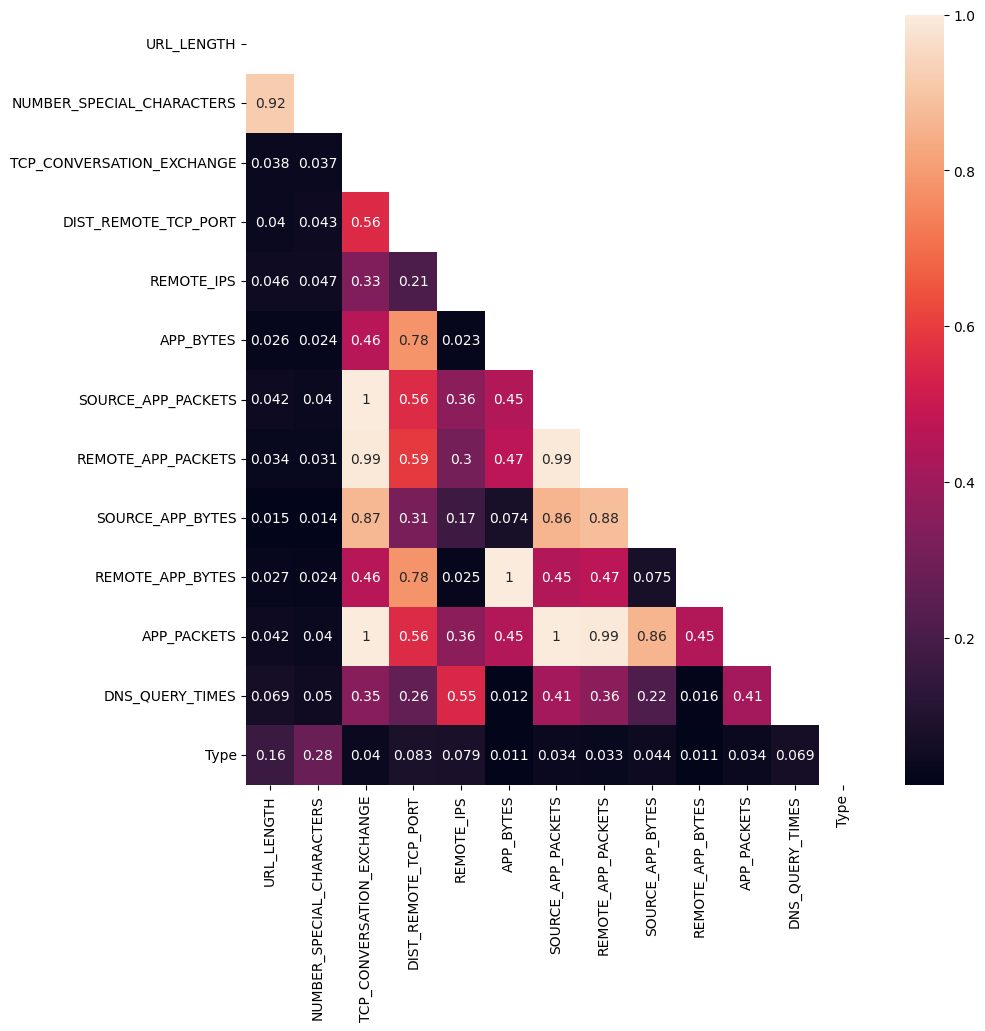

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn

corr = abs(websites.corr(method='pearson', numeric_only=True))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (10,10))
sn.heatmap(data=corr, mask=mask, annot=corr)
#plt.xticks(rotation = 60)
plt.show()

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [10]:
websites.drop(['TCP_CONVERSATION_EXCHANGE'],axis=1, inplace=True)


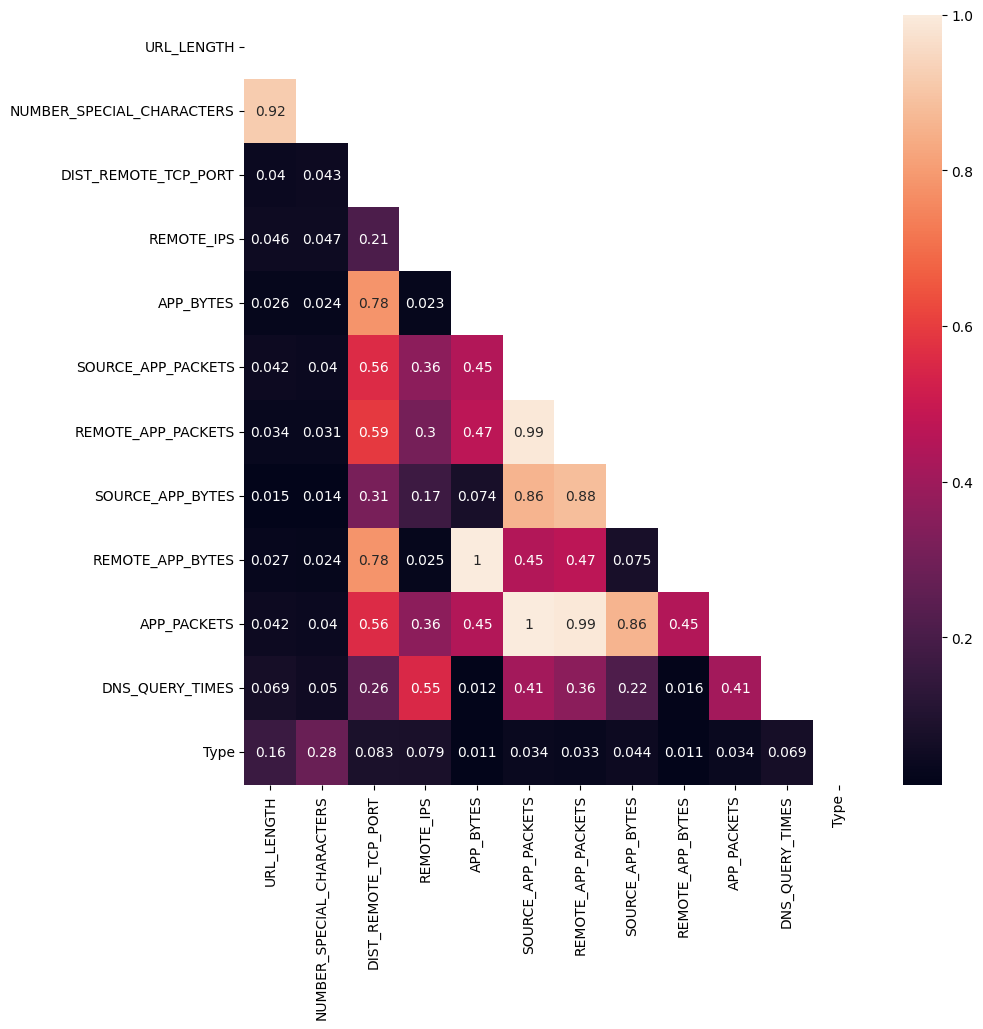

In [11]:
corr = abs(websites.corr(method='pearson', numeric_only=True))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (10,10))
sn.heatmap(data=corr, mask=mask, annot=corr)
#plt.xticks(rotation = 60)
plt.show()

In [12]:
websites.drop(['SOURCE_APP_PACKETS'],axis=1, inplace=True)

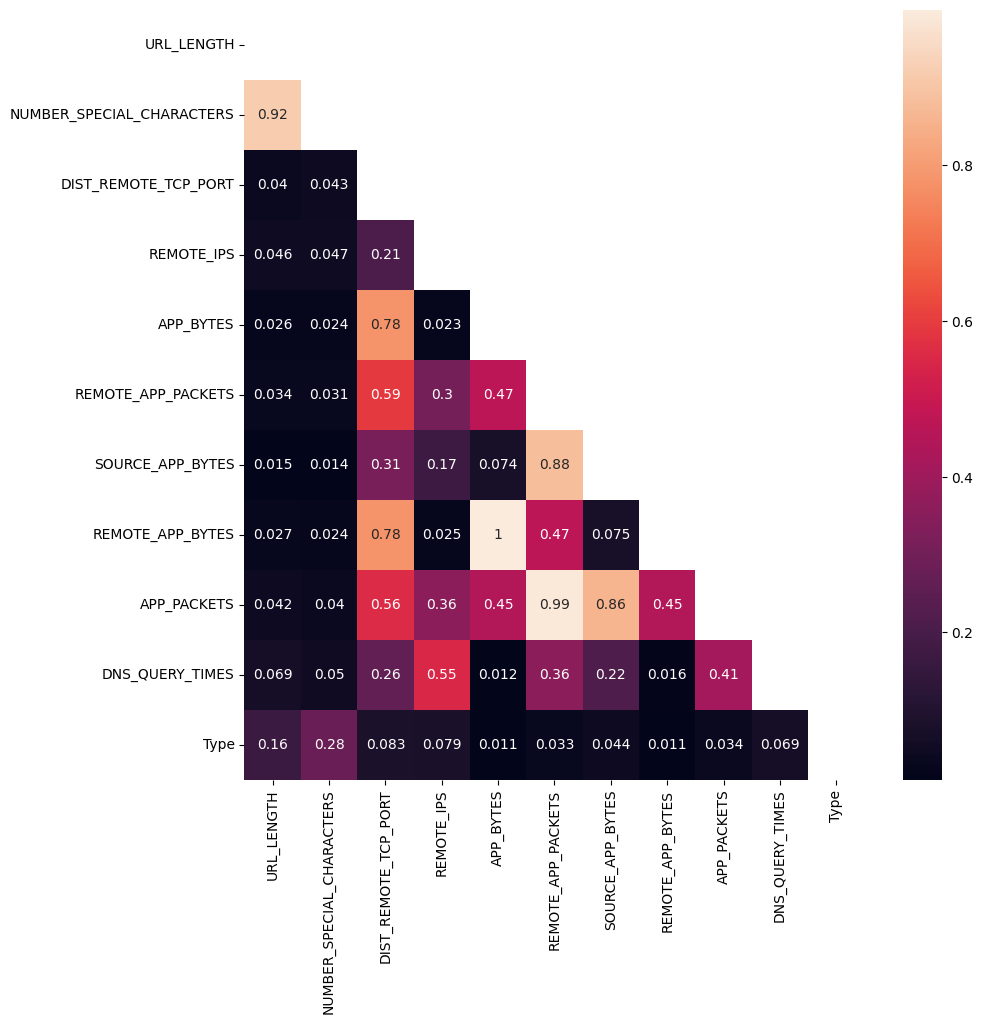

In [13]:
corr = abs(websites.corr(method='pearson', numeric_only=True))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (10,10))
sn.heatmap(data=corr, mask=mask, annot=corr)
#plt.xticks(rotation = 60)
plt.show()


In [14]:
websites.drop(['REMOTE_APP_PACKETS'],axis=1, inplace=True)

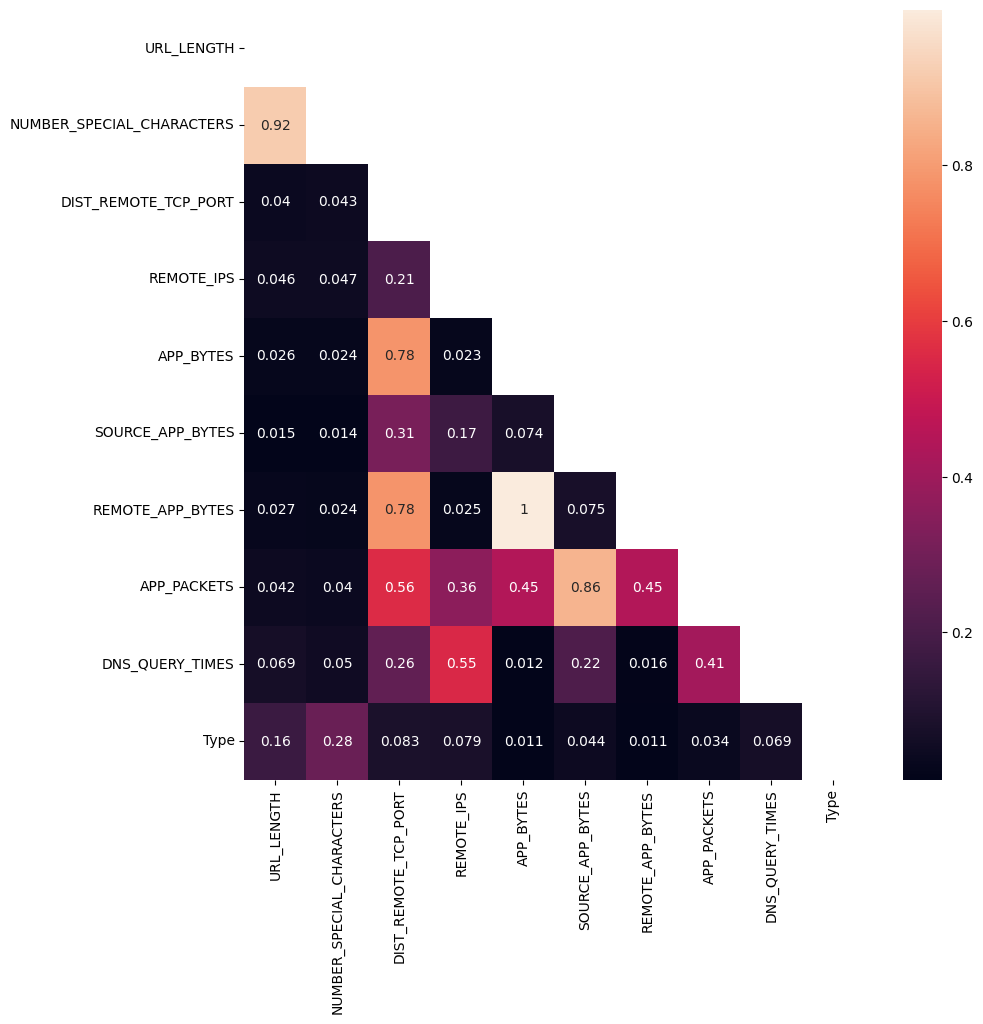

In [15]:
corr = abs(websites.corr(method='pearson', numeric_only=True))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (10,10))
sn.heatmap(data=corr, mask=mask, annot=corr)
#plt.xticks(rotation = 60)
plt.show()

In [16]:
websites.drop(['REMOTE_APP_BYTES'],axis=1, inplace=True)

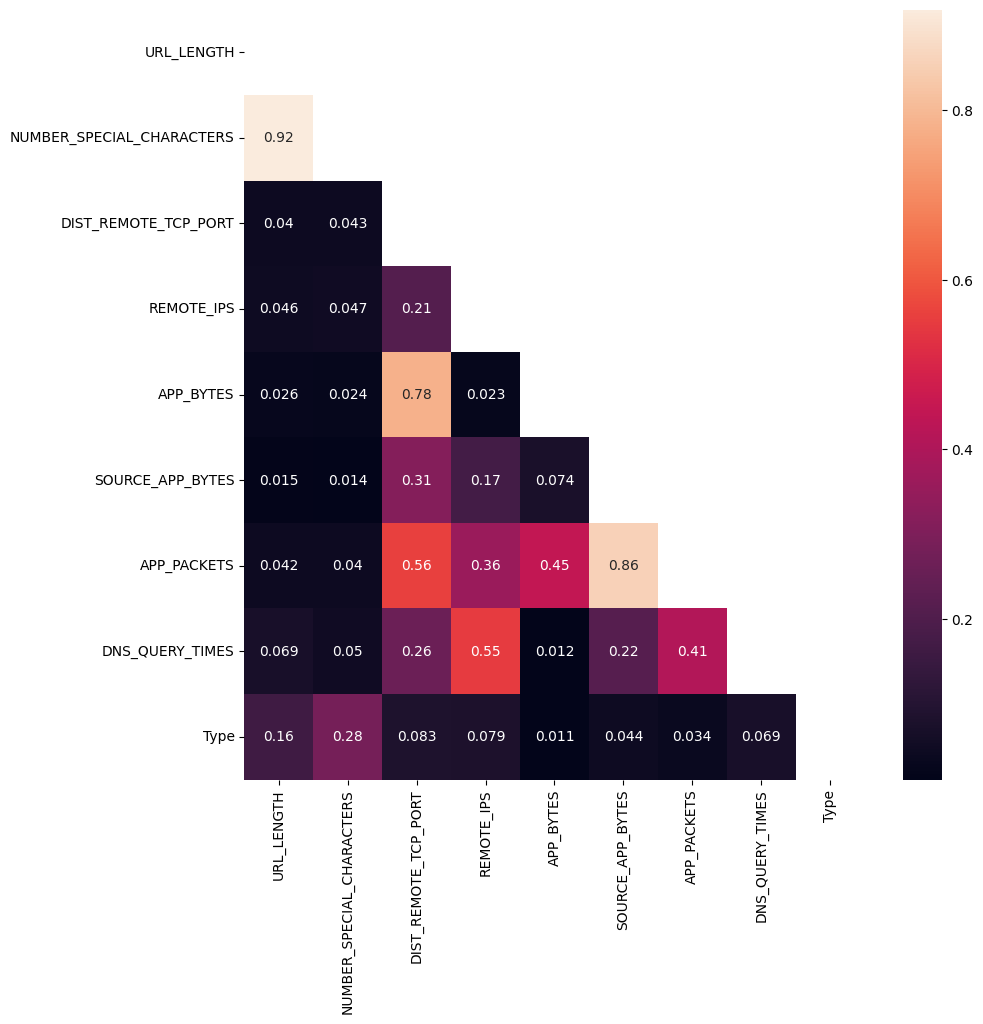

In [17]:
corr = abs(websites.corr(method='pearson', numeric_only=True))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (10,10))
sn.heatmap(data=corr, mask=mask, annot=corr)
#plt.xticks(rotation = 60)
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [18]:
Nas = websites.isna().sum()
Nas_percent = np.array([round(Nas[i]/websites.shape[0],3)*100 for i in Nas.index])
pd.Series(Nas_percent, index=list(websites.columns))


URL                           0.0
URL_LENGTH                    0.0
NUMBER_SPECIAL_CHARACTERS     0.0
CHARSET                       0.4
SERVER                        9.9
WHOIS_COUNTRY                17.2
WHOIS_STATEPRO               20.3
WHOIS_REGDATE                 7.1
WHOIS_UPDATED_DATE            7.8
DIST_REMOTE_TCP_PORT          0.0
REMOTE_IPS                    0.0
APP_BYTES                     0.0
SOURCE_APP_BYTES              0.0
APP_PACKETS                   0.0
DNS_QUERY_TIMES               0.1
Type                          0.0
dtype: float64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

Let's check all the columns with null values one by one, starting with the one with the largest number of null values: 'Whois_statepro'. The final desired output of this program is to detect fraudulent websites, and I believe the information of the owner may provide valuable insights to achieve our goal. Therefore, I am not in favor of dropping these features, except for 'Whois_statepro'.

I can state two reasons to back up my suggestion. First, I plan to keep 'whois_country', so we already have information about the owner's location. Second, many of the missing states are for countries that don't have subdivisions like state, such as China. In these cases, it's challenging or even impossible to fill the null values with meaningful information.


In [19]:
websites.drop(['WHOIS_STATEPRO'], axis=1, inplace=True)

"Whois_country". In order to keep the feature and try as much as possible to not add, additive bias to the data base, instead of filling in the null values with the mode of the variable,I tend to fill in them based on the current distribution of the variable. So first we need to know how many of each instances, there is in the data set. 

In [20]:
null_share_country = round(websites['WHOIS_COUNTRY'].value_counts()/websites.shape[0], 4)


In [21]:
null_share_country

WHOIS_COUNTRY
US                0.6193
CA                0.0472
ES                0.0354
AU                0.0197
PA                0.0118
GB                0.0107
JP                0.0062
UK                0.0056
CN                0.0056
IN                0.0056
FR                0.0051
CZ                0.0051
NL                0.0034
CH                0.0034
[u'GB'; u'UK']    0.0028
KR                0.0028
PH                0.0022
BS                0.0022
ru                0.0022
AT                0.0022
HK                0.0017
us                0.0017
TR                0.0017
BE                0.0017
DE                0.0017
SC                0.0017
KY                0.0017
SE                0.0017
BR                0.0011
UY                0.0011
Cyprus            0.0011
SI                0.0011
UA                0.0011
RU                0.0011
IL                0.0011
NO                0.0011
KG                0.0011
TH                0.0006
se                0.0006
LV         

OK, now I'll fill in the null values


In [22]:
null_share_country.index

Index(['US', 'CA', 'ES', 'AU', 'PA', 'GB', 'JP', 'UK', 'CN', 'IN', 'FR', 'CZ',
       'NL', 'CH', '[u'GB'; u'UK']', 'KR', 'PH', 'BS', 'ru', 'AT', 'HK', 'us',
       'TR', 'BE', 'DE', 'SC', 'KY', 'SE', 'BR', 'UY', 'Cyprus', 'SI', 'UA',
       'RU', 'IL', 'NO', 'KG', 'TH', 'se', 'LV', 'LU', 'United Kingdom', 'UG',
       'PK', 'IT', 'BY', 'AE', 'IE'],
      dtype='object', name='WHOIS_COUNTRY')

In [23]:
null_indices= list(websites[websites['WHOIS_COUNTRY'].isna()].index)

fill_in_values = [(country, null_share_country[country] ) for country in null_share_country.index if null_share_country[country]>0.01] 
fill_in_values = dict(fill_in_values)

nuls_count = websites['WHOIS_COUNTRY'].isna().sum()


In [24]:
fill_in_values = dict(sorted(fill_in_values.items(), key= lambda x: x[1]))
fill_in_values

{'GB': 0.0107,
 'PA': 0.0118,
 'AU': 0.0197,
 'ES': 0.0354,
 'CA': 0.0472,
 'US': 0.6193}

In [25]:
import random
from math import floor 
for country in list(fill_in_values.keys())[:-1]:
    count_country = floor(fill_in_values[country] * nuls_count)
    indices = random.sample(null_indices, count_country)
    null_indices = [value for value in null_indices if value not in indices]
    websites.loc[indices, 'WHOIS_COUNTRY'] = country


websites.loc[null_indices, 'WHOIS_COUNTRY'] = list(fill_in_values.keys())[-1]


In [26]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
WHOIS_COUNTRY                  0
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [27]:
websites['SERVER'].value_counts()

SERVER
Apache                                                       386
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30      1
Apache/2.2.16 (Debian)                                         1
Name: count, Length: 238, dtype: int64

In [28]:
null_share_server = round(websites['SERVER'].value_counts()/websites.shape[0], 4)
null_share_server

SERVER
Apache                                                       0.2167
nginx                                                        0.1185
Microsoft-HTTPAPI/2.0                                        0.0634
cloudflare-nginx                                             0.0528
Microsoft-IIS/7.5                                            0.0286
                                                              ...  
mw2103.codfw.wmnet                                           0.0006
Apache/2.4.25 (Debian)                                       0.0006
ECD (fll/0790)                                               0.0006
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30    0.0006
Apache/2.2.16 (Debian)                                       0.0006
Name: count, Length: 238, dtype: float64

In [29]:
null_indices_server = list(websites[websites['SERVER'].isna()].index)
fill_in_values_server = [(server, null_share_server[server] ) for server in null_share_server.index if null_share_server[server]>0.01] 
fill_in_values_server = dict(fill_in_values_server)
nuls_count_server = websites['SERVER'].isna().sum()
fill_in_values_server = dict(sorted(fill_in_values_server.items(), key= lambda x: x[1]))

In [30]:
for server in list(fill_in_values_server.keys())[:-1]:
    count_server = floor(fill_in_values_server[server] * nuls_count_server)
    indices = random.sample(null_indices_server, count_server)
    null_indices_server = [value for value in null_indices_server if value not in indices]
    websites.loc[indices, 'SERVER'] = server


websites.loc[null_indices_server, 'SERVER'] = list(fill_in_values_server.keys())[-1]


In [31]:
websites['SERVER'].isna().sum()

0

In [32]:
websites['WHOIS_UPDATED_DATE']


0                   NaN
1                   NaN
2                   NaN
3       12/09/2013 0:45
4       11/04/2017 0:00
             ...       
1776     2/09/2016 0:00
1777     2/09/2016 0:00
1778    15/07/2015 0:00
1779     9/12/2016 0:00
1780    20/11/2013 0:00
Name: WHOIS_UPDATED_DATE, Length: 1781, dtype: object

In [33]:
websites['WHOIS_REGDATE'] = pd.to_datetime(websites['WHOIS_REGDATE'],format=r"%d/%m/%Y %H:%M",errors='coerce')

In [34]:
websites['WHOIS_UPDATED_DATE'] = pd.to_datetime(websites['WHOIS_UPDATED_DATE'],format=r"%d/%m/%Y %H:%M",errors='coerce')

In [35]:
websites['WHOIS_REGDATE'] = websites['WHOIS_REGDATE'].interpolate()

In [36]:
websites['WHOIS_UPDATED_DATE'] = websites['WHOIS_UPDATED_DATE'].interpolate()

In [37]:
websites.dropna(inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [38]:
websites.isna().sum()


URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [39]:
websites['WHOIS_COUNTRY'].value_counts().index


Index(['US', 'CA', 'ES', 'AU', 'PA', 'GB', 'JP', 'UK', 'IN', 'FR', 'CN', 'CZ',
       'NL', 'CH', '[u'GB'; u'UK']', 'KR', 'PH', 'BS', 'ru', 'AT', 'HK', 'us',
       'TR', 'BE', 'DE', 'SC', 'KY', 'SE', 'BR', 'UY', 'Cyprus', 'SI', 'UA',
       'RU', 'IL', 'NO', 'KG', 'TH', 'se', 'LV', 'LU', 'United Kingdom', 'UG',
       'PK', 'IT', 'BY', 'AE', 'IE'],
      dtype='object', name='WHOIS_COUNTRY')

In [40]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].str.upper()
websites.loc[websites['WHOIS_COUNTRY'].isin(['GB','UNITED KINGDOM','[U\'GB\'; U\'UK\']']),'WHOIS_COUNTRY'] = 'UK'
websites.loc[websites['WHOIS_COUNTRY'] == 'CYPRUS','WHOIS_COUNTRY'] = 'CY'
websites['WHOIS_COUNTRY'].value_counts().index


Index(['US', 'CA', 'ES', 'AU', 'UK', 'PA', 'JP', 'IN', 'FR', 'CN', 'CZ', 'CH',
       'NL', 'RU', 'KR', 'AT', 'BS', 'PH', 'SE', 'KY', 'TR', 'DE', 'HK', 'SC',
       'BE', 'NO', 'UA', 'UY', 'CY', 'SI', 'KG', 'IL', 'BR', 'TH', 'PK', 'IT',
       'UG', 'BY', 'AE', 'IE', 'LV', 'LU'],
      dtype='object', name='WHOIS_COUNTRY')

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in 

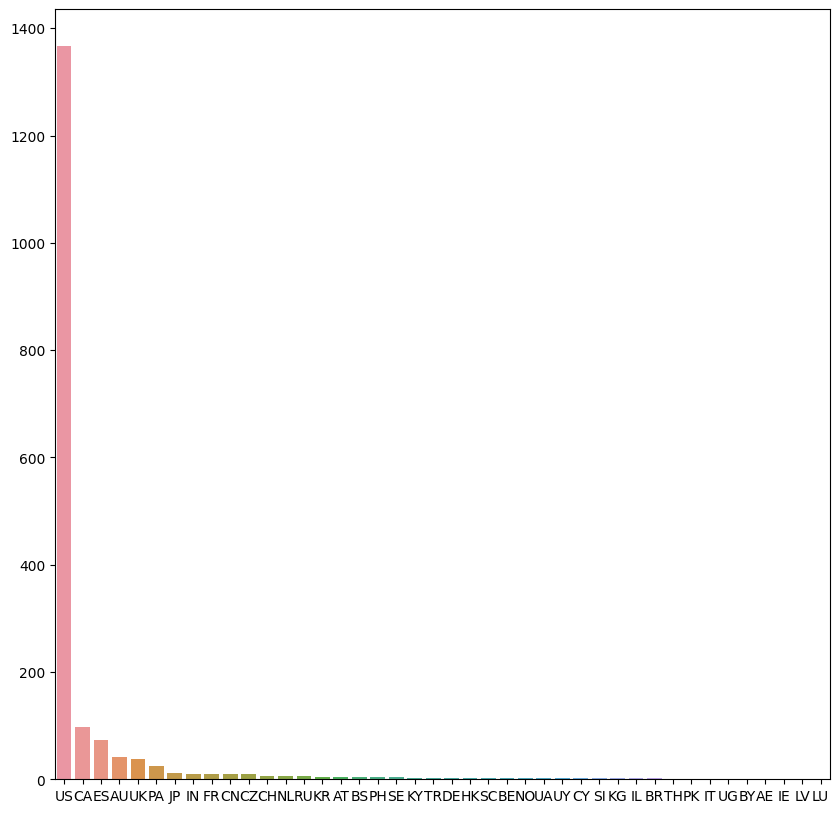

In [41]:
countries = list(websites['WHOIS_COUNTRY'].value_counts().index)
occurance = list(websites['WHOIS_COUNTRY'].value_counts().values)
f, ax = plt.subplots(figsize = (10,10))
sn.barplot(x = countries, y = occurance)
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [42]:
less_commons = list(websites['WHOIS_COUNTRY'].value_counts().index)[10:]
websites.loc[websites['WHOIS_COUNTRY'].isin(less_commons),'WHOIS_COUNTRY'] = 'OTHER'
websites['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
US       1367
CA         97
OTHER      91
ES         73
AU         41
UK         38
PA         24
JP         11
IN         10
FR          9
CN          9
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [43]:
websites.drop(['WHOIS_REGDATE','WHOIS_UPDATED_DATE'], axis=1 , inplace=True)



In [44]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'WHOIS_COUNTRY', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'SOURCE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [45]:
websites.dtypes


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [46]:
websites.drop(['URL'], axis=1, inplace=True)


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [47]:
websites['CHARSET'].unique()

array(['ISO-8859-1', 'UTF-8', 'iso-8859-1', 'us-ascii', 'utf-8',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [48]:
websites['SERVER'].value_counts()


SERVER
Apache                                                             495
nginx                                                              230
Microsoft-HTTPAPI/2.0                                              123
cloudflare-nginx                                                   103
Microsoft-IIS/7.5                                                   56
                                                                  ... 
CherryPy/3.6.0                                                       1
mw2241.codfw.wmnet                                                   1
Apache/1.3.33 (Unix) mod_ssl/2.8.24 OpenSSL/0.9.7e-p1 PHP/4.4.8      1
lighttpd                                                             1
Apache/2.2.16 (Debian)                                               1
Name: count, Length: 235, dtype: int64

![Think Hard](../images/think-hard.jpg)

In [49]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [50]:
websites['SERVER'] = websites['SERVER'].str.lower()
for server in ['microsoft', 'apache', 'nginx']:
    websites.loc[websites['SERVER'].str.contains(server),'SERVER'] = server
websites.loc[~(websites['SERVER'].str.contains('microsoft|apache|nginx')),'SERVER'] = 'Other'

In [51]:
websites['SERVER'].value_counts()

SERVER
apache       752
nginx        467
Other        340
microsoft    211
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [52]:
websites.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [53]:
websites_dummy = pd.get_dummies(websites,columns=['SERVER','CHARSET','WHOIS_COUNTRY'])


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [54]:
websites_dummy.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
SERVER_Other                    bool
SERVER_apache                   bool
SERVER_microsoft                bool
SERVER_nginx                    bool
CHARSET_ISO-8859                bool
CHARSET_ISO-8859-1              bool
CHARSET_UTF-8                   bool
CHARSET_iso-8859-1              bool
CHARSET_us-ascii                bool
CHARSET_utf-8                   bool
CHARSET_windows-1251            bool
CHARSET_windows-1252            bool
WHOIS_COUNTRY_AU                bool
WHOIS_COUNTRY_CA                bool
WHOIS_COUNTRY_CN                bool
WHOIS_COUNTRY_ES                bool
WHOIS_COUNTRY_FR                bool
WHOIS_COUNTRY_IN                bool
W

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_trian, y_test = train_test_split(websites_dummy.drop(['Type'], axis=1), websites_dummy['Type'], test_size = .2, random_state = 104)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()



Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [57]:
model = model.fit(X_train, y_trian)

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [58]:
from sklearn.metrics import accuracy_score

prediction = model.predict(X_test)
accuracy_score(y_test, prediction)

0.8898305084745762

In [59]:
from sklearn.metrics import confusion_matrix

CM = pd.DataFrame(confusion_matrix(y_test, prediction))
CM.rename({0: 'legit - Pred', 1: 'malicious - Pred'}, axis=1, inplace=True)
CM.rename({0: 'legit - Lable', 1: 'malicious - Lable'}, axis=0, inplace=True)
CM

,legit - Pred,malicious - Pred
legit - Lable,303,3
malicious - Lable,36,12


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       306
           1       0.80      0.25      0.38        48

    accuracy                           0.89       354
   macro avg       0.85      0.62      0.66       354
weighted avg       0.88      0.89      0.86       354



What are your thoughts on the performance of the model? Write your conclusions below.

Our model performed so well to detect legit websites but on the other hand gained a very low score in detecting malicious websites. One reason is that our data set is imbalanced. Let's make sure!

In [67]:
websites_dummy['Type'].value_counts()

Type
0    1556
1     214
Name: count, dtype: int64

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [61]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn = model_knn.fit(X_train, y_trian)


To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [62]:
prediction_knn = model_knn.predict(X_test)
accuracy_score(y_test, prediction_knn)



0.9209039548022598

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       306
           1       0.74      0.65      0.69        48

    accuracy                           0.92       354
   macro avg       0.84      0.80      0.82       354
weighted avg       0.92      0.92      0.92       354



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [71]:
model_knn_5 = KNeighborsClassifier(n_neighbors = 5)
model_knn_5 = model_knn_5.fit(X_train, y_trian)


In [75]:
prediction_knn_5 = model_knn_5.predict(X_test)
accuracy_score(y_test, prediction_knn_5)


0.9124293785310734

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_knn_5))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       306
           1       0.70      0.62      0.66        48

    accuracy                           0.91       354
   macro avg       0.82      0.79      0.80       354
weighted avg       0.91      0.91      0.91       354



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

By increasing the number of neighbors, the accuracy of model dropped. It seems that higher n, leads the model to over fit. let's see the training accuracy for both models.

In [78]:
print("train accuracy for Knn_3 is ", model_knn.score(X_train, y_trian))
print("train accuracy for Knn_5 is ", model_knn_5.score(X_train, y_trian))



train accuracy for Knn_3 is  0.961864406779661
train accuracy for Knn_5 is  0.951271186440678


just seems both models have a higher training accuracy, so it doesn't tell us anything. what a bout another step of n.

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

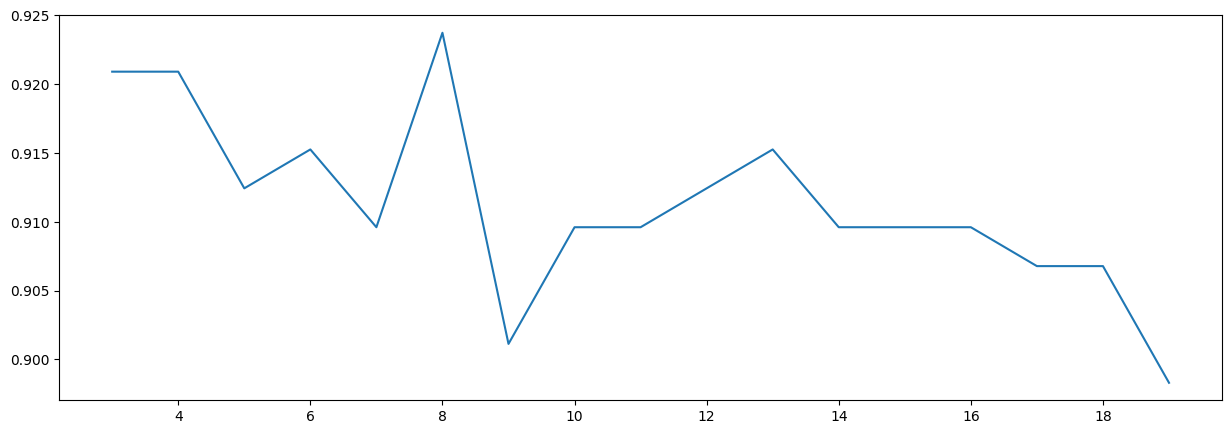

In [89]:
result = dict()
for k in range(3,20):
    model_knn_k = KNeighborsClassifier(n_neighbors = k)
    model_knn_k = model_knn_k.fit(X_train, y_trian)
    prediction_knn_k = model_knn_k.predict(X_test)
    result[k] = accuracy_score(y_test, prediction_knn_k)

fig, ax = plt.subplots(figsize=(15,5))
sn.lineplot(x=result.keys(), y=result.values())
plt.show()



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [65]:
# Your code here